While much focus is given to Offensive and Defensive statistics for NFL teams, I wanted to explore Special Teams and the impact that it may have on ultimate team performance (measured in terms of Win Percentage in the regular season).

I start here with Punting data. 

All data was sourced from https://www.pro-football-reference.com/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import punting CSV - remove aggregate rows by dropping rows with NAs
punting = pd.read_csv('NFL2022Punting.csv').dropna()
#sanitize columns into acceptable variable names
punting = punting.rename(columns={'Y/P': 'YP', 'NY/P': 'NYP', 'TB%': 'TBPerc', 'In20%': 'In20Perc'})
punting.head()

,Rk,Tm,G,Pnt,Yds,YP,RetYds,Net,NYP,Lng,TB,TBPerc,In20,In20Perc,Blck
0,1.0,Denver Broncos,17.0,96.0,4470.0,46.6,362.0,3974.0,41.4,59.0,6.0,6.30%,30.0,31.30%,0.0
1,2.0,Tennessee Titans,17.0,90.0,4779.0,53.1,636.0,3907.0,43.4,74.0,9.0,10.00%,30.0,33.30%,0.0
2,3.0,Houston Texans,17.0,88.0,4229.0,48.1,401.0,3735.0,42.4,67.0,4.0,4.50%,37.0,42.00%,0.0
3,4.0,Washington Commanders,17.0,83.0,3885.0,46.8,219.0,3567.0,43.0,68.0,5.0,6.00%,37.0,44.60%,0.0
4,5.0,New York Jets,17.0,83.0,3889.0,46.9,363.0,3386.0,40.8,72.0,8.0,9.60%,27.0,32.50%,0.0


In [2]:
#import team standings CSV - remove aggregate rows by dropping rows with NAs
teamstandings = pd.read_csv('NFL2022TeamStandings.csv').dropna()
#sanitize columns into acceptable variable names
teamstandings = teamstandings.rename(columns={'W-L%': 'WLPerc'})
teamstandings.head()

,Tm,W,L,T,WLPerc,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS
0,Buffalo Bills*,13,3,0,0.813,455,286,169,10.6,0.4,10.9,7.1,3.8
1,Miami Dolphins+,9,8,0,0.529,397,399,-2,-0.1,2.0,1.8,2.7,-0.9
2,New England Patriots,8,9,0,0.471,364,347,17,1.0,1.0,2.0,-0.3,2.3
3,New York Jets,7,10,0,0.412,296,316,-20,-1.2,2.0,0.8,-4.0,4.8
4,Cincinnati Bengals*,12,4,0,0.750,418,322,96,6.0,0.9,6.9,5.5,1.4


In [3]:
#Create a function that simplifies the team name so they can be easily matched and analyzed
def simplifyTeamName(team):
    splitted = team.split(' ') #create list from team name, separated by spaces
    mascot = splitted[-1] #take only the last word in the team name
    mascot = mascot.replace('*', '').replace('+', '') #remove any instances of '*' or '+' that were present 
                                                      #in original source data representing footnotes
    return mascot

In [4]:
#Use new simplifyTeamName function to clean team name for both dataframes
punting.Tm = punting.Tm.apply(simplifyTeamName)
teamstandings.Tm = teamstandings.Tm.apply(simplifyTeamName)



In [5]:
#Now that the 'Tm' column from both dataframes has been cleaned, we can merge the two dataframes
puntdf = punting.merge(teamstandings)
puntdf.head()

,Rk,Tm,G,Pnt,Yds,YP,RetYds,Net,NYP,Lng,...,T,WLPerc,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS
0,1.0,Broncos,17.0,96.0,4470.0,46.6,362.0,3974.0,41.4,59.0,...,0,0.294,287,359,-72,-4.2,-0.7,-5.0,-5.6,0.6
1,2.0,Titans,17.0,90.0,4779.0,53.1,636.0,3907.0,43.4,74.0,...,0,0.412,298,359,-61,-3.6,0.0,-3.6,-4.7,1.1
2,3.0,Texans,17.0,88.0,4229.0,48.1,401.0,3735.0,42.4,67.0,...,1,0.206,289,420,-131,-7.7,-0.8,-8.5,-5.4,-3.1
3,4.0,Commanders,17.0,83.0,3885.0,46.8,219.0,3567.0,43.0,68.0,...,1,0.500,321,343,-22,-1.3,0.4,-0.9,-3.5,2.6
4,5.0,Jets,17.0,83.0,3889.0,46.9,363.0,3386.0,40.8,72.0,...,0,0.412,296,316,-20,-1.2,2.0,0.8,-4.0,4.8


First we analyze the relationship between the number of punts each team attempted during the season and their respective Win Percentage. The correlation of -0.504 seems to suggest that some relationship holds: the more punts a team attempts, the lower their Win Percentage.

Intuitively, since teams tend to punt only when they have failed to score on an offensive drive, teams with more punt attempts failed to score more often and thus were less likely to win.

For further analysis we could normalize punt attempts by number of total drives for each team in order to eliminate any noise from certain teams having more offensive drives overall leading to more punts.

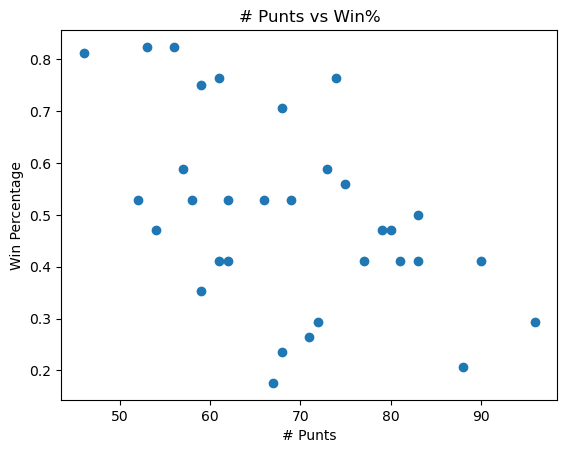

# Punts vs Win% Correlation: -0.504


In [6]:
plt.scatter(puntdf.Pnt, puntdf.WLPerc)
plt.xlabel('# Punts')
plt.ylabel('Win Percentage')
plt.title('# Punts vs Win%')
plt.show()

print('# Punts vs Win% Correlation: '+str(round(puntdf.Pnt.corr(puntdf.WLPerc), 3)))


Next we analyze the relationship between Yards Per Punt, both on a gross and net basis, and Win Percentage. Since Yards Per Punt is a measure of punt quality, we would expect a positive correlation if punting is important to a team's chances of winning.

At first glance, neither scatterplot shows a convincing relationship between Yards Per Punt (or Net Yards Per Punt) and Win Percentage.

The near-zero correlation of -0.085 between Yards Per Punt and Win% corroborates the initial visual analysis of the plot: changing Yards/Punt doesn't meaningfully impact Win%.

The correlation between Net Yards Per Punt and Win% is slightly higher at 0.042, suggesting that a team's ability to limit punt return success may slightly improve their Win%, but the overall impact from punting and stopping returns is de minimus (correlation is still near zero).

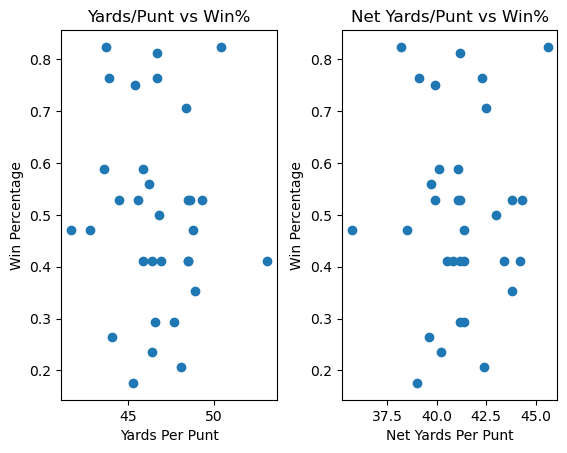

Yards per Punt vs Win% Correlation: -0.085
Net Yards per Punt vs Win% Correlation: 0.042


In [7]:
plt.subplot(1, 2, 1)
plt.scatter(puntdf.YP, puntdf.WLPerc)
plt.xlabel('Yards Per Punt')
plt.ylabel('Win Percentage')
plt.title('Yards/Punt vs Win%')
plt.subplot(1, 2, 2)
plt.scatter(puntdf.NYP, puntdf.WLPerc)
plt.xlabel('Net Yards Per Punt')
plt.ylabel('Win Percentage')
plt.title('Net Yards/Punt vs Win%')
plt.subplots_adjust(wspace = 0.3)
plt.show()

print('Yards per Punt vs Win% Correlation: '+str(round(puntdf.YP.corr(puntdf.WLPerc), 3)))
print('Net Yards per Punt vs Win% Correlation: '+str(round(puntdf.NYP.corr(puntdf.WLPerc), 3)))
